In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel(r'C:\Users\vikag\Desktop\Data-Science-Projects\Techno Industries Inc\Techno Industries Inc. Data.xlsx')

In [3]:
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,"LCD, LED, OLED displays",Actuators,Fuse,Resistors,Light Emitting Diode (LED)
State,Massachusetts,New Hampshire,Maine,Maine,New Jersey
Zip Code,2109,3084,4250,4544,7023
Business Type,Industrial,Industrial,Aerospace,Agriculture,Aerospace
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33.0,22.0,11.0,479.0,510.0
Revenue (total),270.6,101.64,26.4,2294.41,943.5


In [4]:
df.fillna('New Mexico', inplace=True)

In [5]:
df['Quantity'] = df['Quantity'].astype(int)

# Encode Categories


In [6]:
df.Product = LabelEncoder().fit_transform(df.Product)
df.State = LabelEncoder().fit_transform(df.State)
df['Business Type'] = LabelEncoder().fit_transform(df['Business Type'])

In [7]:
df.head().T

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00
Customer ID,10318,10173,10217,10021,10041
Product,3,0,2,7,5
State,18,26,16,16,27
Zip Code,2109,3084,4250,4544,7023
Business Type,2,2,0,1,0
Cost (per unit),2.06,0.55,2.215,1.575,1.725
Price (per unit),8.2,4.62,2.4,4.79,1.85
Quantity,33,22,11,479,510
Revenue (total),270.6,101.64,26.4,2294.41,943.5


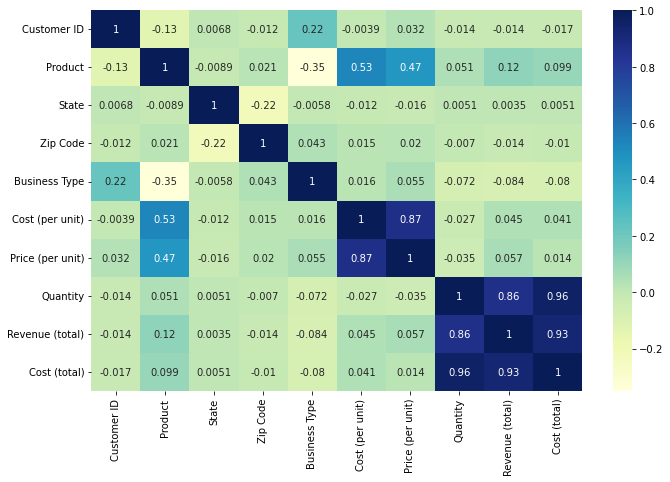

In [8]:
sns.heatmap(df.corr(), yticklabels=True, annot=True, cmap="YlGnBu")
plt.gcf().set_size_inches(11, 7)

In [9]:
df_d = df.drop(['Customer ID', 'Date'], axis=1)

In [10]:
for col in df_d.columns:
    print(col)

Product
State
Zip Code
Business Type
Cost (per unit)
Price (per unit)
Quantity
Revenue (total)
Cost (total)


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression

In [14]:
X = df_d.drop(columns = ['Product','Zip Code', 'State'])
y = df_d['Product']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

LR_mod = LogisticRegression(max_iter = 1000)

grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR_GS = GridSearchCV(LR_mod, grid, cv = None, n_jobs = -1)

LR_GS.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [15]:
print("tuned hpyerparameters :(best parameters) ",LR_GS.best_params_)

print("accuracy :",LR_GS.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100}
accuracy : 0.9108260639248874


# Random Forest Classifier


In [22]:
# n_jobs=-1, to utilise all processors!
# cv=None, to use the default 5-fold cross validation.
# verbose=2, to display the score is also displayed.

X = df_d.drop(columns = ['Product','Zip Code', 'State'])
y = df_d['Product']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


n_estimators = [0.01, 0.1, 1, 10, 100, 200]
max_depth = [40]
min_samples_split = [4, 7, 10]

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

RF_mod = RandomForestClassifier()

RF_GS = GridSearchCV(estimator = RF_mod, param_grid = param_grid, verbose = 2, cv = None, n_jobs = -1)

RF_GS.fit(X_train, y_train)

RF_GS.best_params_

prediction_RF = RF_m.predict(X_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_depth': 40, 'min_samples_split': 4, 'n_estimators': 100}

In [41]:
print(classification_report(y_test, prediction_RF));

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1679
           1       1.00      1.00      1.00      1238
           2       1.00      1.00      1.00      1872
           3       1.00      1.00      1.00       715
           4       1.00      1.00      1.00       649
           5       1.00      1.00      1.00      1059
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00       796
           8       1.00      1.00      1.00       475
           9       1.00      1.00      1.00       387
          10       1.00      1.00      1.00       143

    accuracy                           1.00      9104
   macro avg       1.00      1.00      1.00      9104
weighted avg       1.00      1.00      1.00      9104



In [23]:
print(f'Train Accuracy - : {RF_GS.score(x_train, y_train):.3f}')

print(f'Test Accuracy - : {RF_GS.score(x_test, y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000
